# **West Roxbury**

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rc('figure', figsize=(15, 5))

## Objective:

To predict the value of homes in West Roxbury.

# Data

## Get and Clean Data

In [52]:
file_name = 'datasets/WestRoxbury.csv'

dropColumns = ['TAX']

housing_df = (
    pd.read_csv(file_name)
    .rename(columns=lambda x: x.strip().replace(' ', '_'))
    .drop(columns=dropColumns)
)

rows, columns = housing_df.shape
print(f'Data successfully loaded with {rows} rows and {columns} columns.')

Data successfully loaded with 5802 rows and 13 columns.


In [54]:
housing_df = pd.get_dummies(housing_df, drop_first=True)

## Explore Data

### Head

In [26]:
housing_df.head()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN


In [ ]:
housing_df.dum

### Data Types

In [17]:
housing_df.dtypes

TOTAL_VALUE    float64
TAX              int64
LOT_SQFT         int64
YR_BUILT         int64
GROSS_AREA       int64
LIVING_AREA      int64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object

### Missing Values

In [19]:
housing_df.isna().sum().sum()

0

### Unique Values

In [21]:
distinct = housing_df.nunique()
# distinct.plot.barh();
distinct

TOTAL_VALUE    2748
TAX            2735
LOT_SQFT       3096
YR_BUILT        149
GROSS_AREA     2318
LIVING_AREA    1712
FLOORS            5
ROOMS            12
BEDROOMS          9
FULL_BATH         5
HALF_BATH         4
KITCHEN           2
FIREPLACE         5
REMODEL           3
dtype: int64

### Outliers

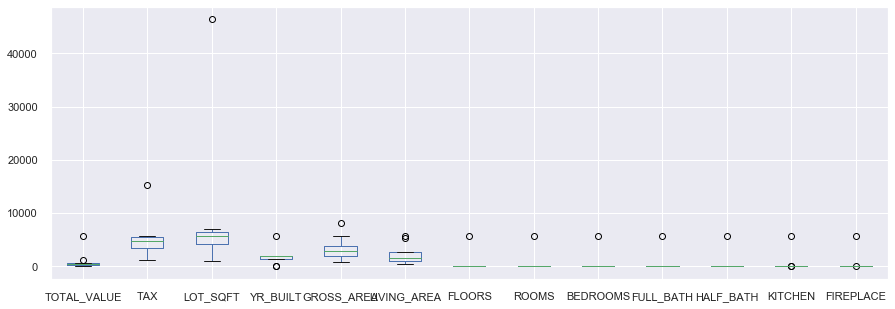

In [28]:
housing_df.describe().plot.box();

In [29]:
housing_df.REMODEL.value_counts()

Recent    875
Old       581
Name: REMODEL, dtype: int64

In [30]:
housing_df.LOT_SQFT.nlargest(5)

4571    46411
4036    39000
3276    37647
2727    34261
1739    33384
Name: LOT_SQFT, dtype: int64

numerical = housing_df.select_dtypes(np.number).columns
pair = sns.pairplot(data=housing_df[numerical])

# Modeling

**Task:** Predict the value of `Total_Value`

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
# Partition the data
from sklearn.model_selection import train_test_split

In [55]:
X = housing_df.drop('TOTAL_VALUE', axis=1)
y = housing_df['TOTAL_VALUE']

In [61]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [62]:
model = LinearRegression()
model.fit(train_X, train_y)
train_pred = model.predict(train_X)

In [63]:
train_pred

array([387.72625824, 430.78554025, 384.04295183, ..., 428.91053001,
       329.96069022, 350.32994725])

In [67]:
results = pd.DataFrame({'TOTAL_VALUE': train_y, 
                       'PREDICTED': train_pred, 
                       'RESIDUAL': train_y - train_pred})
results.sort_index().head()

,TOTAL_VALUE,PREDICTED,RESIDUAL
0,344.2,387.818610,-43.618610
2,330.1,360.441312,-30.341312
7,320.4,318.245603,2.154397
8,333.5,336.195112,-2.695112
9,409.4,508.638004,-99.238004


In [69]:
housing_df.iloc[[0, 2, 7, 8, 9]]

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,9965,1880,2436,1352,2.0,6,3,1,1,1,0,0,0
2,330.1,7500,1890,2294,1371,2.0,8,4,1,1,1,0,0,0
7,320.4,10000,1950,2208,1200,1.0,6,3,1,0,1,0,0,0
8,333.5,6835,1958,2582,1092,1.0,5,3,1,0,1,1,0,1
9,409.4,5093,1900,4818,2992,2.0,8,4,2,0,1,0,0,0
